In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('HouseTrain.csv')
test = pd.read_csv('HouseTest.csv')

In [2]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [3]:
pd.set_option('display.max_columns', None)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

SKEW is: 1.8828757597682129


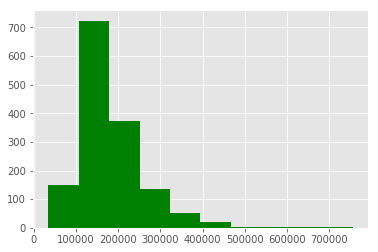

In [6]:
"""
Checking skewness, which is a measure of the shape of the distribution of values
When performing regression, it makes sense to log-transform the target variable when its skewed.
One reason for this is to improve the linearity of the data.
The predictons generated by the final model will also be log-transformed, so we'll need to convert these predictions back to their original form later.
"""
%matplotlib inline

print ("SKEW is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color = 'green')
plt.show()

SKEW is: 0.12133506220520406


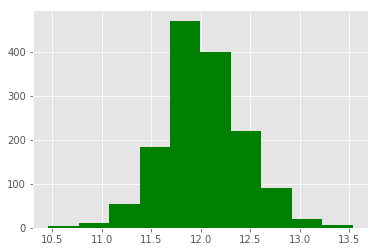

In [7]:
target = np.log(train.SalePrice)
print ("SKEW is:", target.skew())
plt.hist(target, color = 'green')
plt.show()

In [8]:
#Working with numeric types
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [9]:
#Displaying the correlation/relationship between the columns
corr = numeric_features.corr()

In [10]:
#5 features most +vely correlated with SalePrice
print (corr['SalePrice'].sort_values(ascending = False)[:5])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


In [11]:
#5 features most -vely correlated with SalePrice
print (corr['SalePrice'].sort_values(ascending = False)[-5:])

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [12]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [13]:
#Creating a pivot table to further investigate the relationship between OverallQual and SalePrice
quality_pivot = train.pivot_table(index = 'OverallQual', values = 'SalePrice', aggfunc = np.mean)
quality_pivot

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714
9,367513.023256


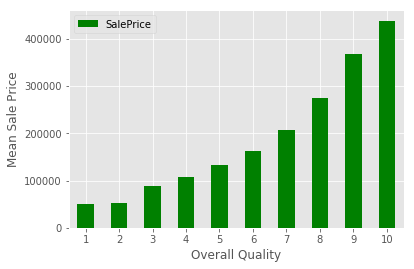

In [14]:
#Visualizing the pivot table more easily
quality_pivot.plot(kind = 'bar', color = 'green')
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation = 0)
plt.show()

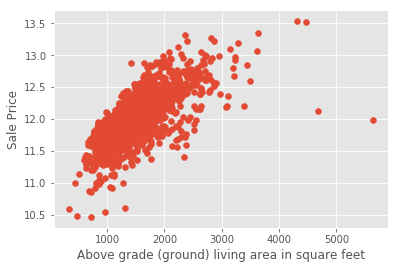

In [15]:
"""
Here, its found that the mean sales price strictly increases as Overall Quality increases
Now, we generate some scatter plots to visualize the relationship between GrLivArea and SalePrice
"""
plt.scatter(x = train['GrLivArea'], y = target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area in square feet')
plt.show()

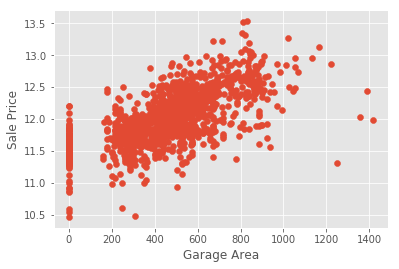

In [16]:
#Doing the previous step again for the garage area
plt.scatter(x = train['GarageArea'], y = target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

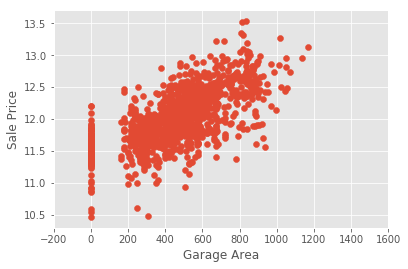

In [17]:
"""
Its noticed that there are many homes with 0 for Garage Area, indicating that they don't have a garage.
There are a few outliers as well.
Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line.
So, we need to remove these observations from our data.
We now create a new dataframe with some outliers removed.
"""
train = train[train['GarageArea'] < 1200]

plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))
plt.xlim(-200, 1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [18]:
#Handling the NULL or the missing values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
pd.set_option('display.max_rows', None)
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [19]:
#Taking a look at the MiscFeature column
print ("Unique values are:", train.MiscFeature.unique())
#Its important to gather domain knowledge in order to make the best decisions when dealing with missing data.

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [20]:
#Wrangling the non-numeric features
categoricals = train.select_dtypes(exclude = [np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


In [21]:
"""
'count' column indicates the number of non-null observations.
'unique' counts the number of unique values.
'top' is the most commonly occuring value.
'freq' shows the frequency of the top value.
We now might want to use the One-hot encoding technique to make use of the information for modeling.
One-hot encoding is a technique which will transform categorical data into numbers so the model can understand whether or not a parcticular observation falls into one category or another.
Any transformations that have been applied to the training data bfore fitting the model 'must be' applied to the test data.
This is because our model expects that the shape of the features from the train set match those from the test set.
"""
#Let's consider the Street data
print ("Original:\n")
print (train.Street.value_counts(), '\n')

Original:

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [22]:
"""
Since our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.
We create a new column called 'enc_street'.
"""
train['enc_street'] = pd.get_dummies(train.Street, drop_first = True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first = True)

print ('Encoded: \n')
print (train.enc_street.value_counts())


Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


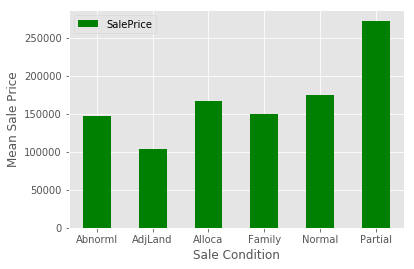

In [23]:
#Engineering the 'SaleCondition' feature
condition_pivot = train.pivot_table(index = 'SaleCondition', values = 'SalePrice', aggfunc = np.mean)
condition_pivot.plot(kind = 'bar', color = 'green')
plt.xlabel('Sale Condition')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation = 0)
plt.show()

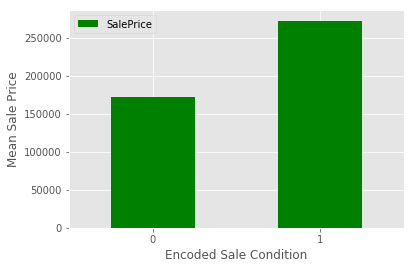

In [24]:
"""
'Partial' has a significantly higher Mean Sale Price than the others.
So, we will encode this as a new feature. 
We select all of the house where 'SaleCondition' = 'Partial' and assign the value 1, otherwise assign 0
"""
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)
    
#Now, let's explore this new feature as a plot
condition_pivot = train.pivot_table(index = 'enc_condition', values = 'SalePrice', aggfunc = np.mean)
condition_pivot.plot(kind = 'bar', color = 'green')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation = 0)
plt.show()

In [25]:
"""
Before we prepare the data for modelling, we need to deal with the missing data.
We'll fill the missing values with an average value and then assign the results to data.
This is a method of interpolation.
This is a quick and simple method of dealing with missing values and might not lead to the best performance of the model on new data.
"""
data = train.select_dtypes(include = [np.number]).interpolate().dropna()
#to check if all of the columns have 0 NULL values
sum(data.isnull().sum() != 0)


0

In [26]:
#Separating the features and the target variable for modeling - we won't include 'SalePrice' for obvious reasons and 'Id' is just an index with no relationship to 'SalePrice'.
y = np.log(train.SalePrice)
x = data.drop(['SalePrice', 'Id'], axis = 1)

In [27]:
#Partitioning the data and starting the modeling
"""
train_test_split() returns 4 objects : 
'x_train' is the subset of our features used for training.
'x_test' is the subset which will be our hold-out set - what we'll use to test the model.
'y_train' is the target variable 'SalePrice' which corresponds to 'x_train'
'y_test' is the target variable 'SalePrice' which corresponds to 'x_test'
We set 'random_state = 42', which provides reproducible results, as scikit-learn's train_test_split() will randomly the partition the data.
The 'test_size' parameter tells the function what proportion of the data should be used in the 'test' partition.
"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 6, test_size = .33)

In [28]:
#First, we create a Linear Regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()

#Now, we fit the model
model = lr.fit(x_train, y_train)

In [29]:
"""
The R-squared value is a measure of how close the data are to the fitted regression line.
It takes a valuew between 0 and 1, 1 meaning that all of the variance in the target is explained by the data.
In general, a higher R-squared value means a better fit.
"""
print ("R-squared is: \n", model.score(x_test, y_test))

R-squared is: 
 0.8607750251498425


In [30]:
#Now, we'll consider RMSE
#The model.predict() method will return a list of predictions, given a set of predictors.
#We'd use model.predict() after fitting the model.
predictions = model.predict(x_test)

from sklearn.metrics import mean_squared_error
print ("RMSE is: \n", mean_squared_error(y_test, predictions))
#The RMSE value measures the distance between our predicted values and actual values.

RMSE is: 
 0.022095834075349152


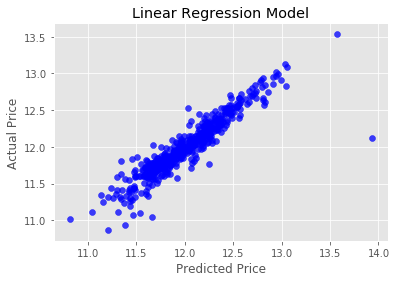

In [31]:
#Viewing the relationship graphically with a scatter plot
actual_values = y_test
#Alpha helps to show overlapping data
plt.scatter(predictions, actual_values, alpha = .75, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

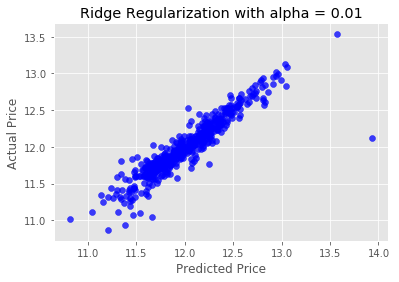

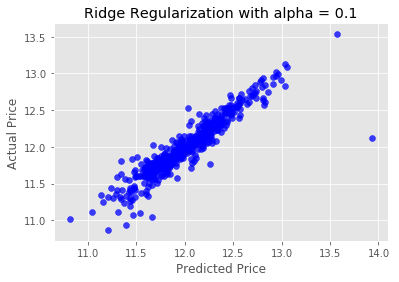

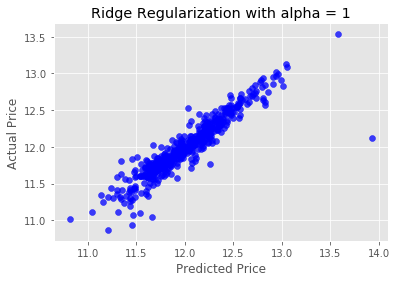

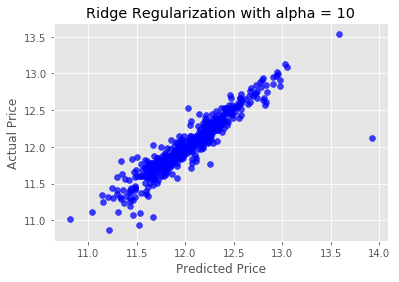

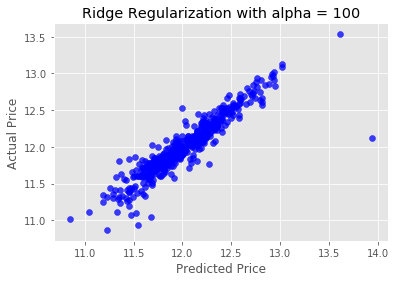

In [32]:
#Ridge Regularization is a process which shrinks the regression coefficients of less important features
for i in range(-2, 3):
    alpha = 10 ** i
    rm = linear_model.Ridge(alpha = alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)
    
    plt.scatter(preds_ridge, actual_values, alpha = .75, color = 'b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R-squared is: {}\nRMSE is: {}'.format(ridge_model.score(x_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
    plt.show()

In [33]:
#Doing a submission
submission = pd.DataFrame()
submission['id'] = test.Id

#Selecting the features from the test data
feats = test.select_dtypes(include = [np.number]).drop(['Id'], axis = 1).interpolate()

#Generating our predictions
predictions = model.predict(feats)

#Transforming the predictions to the correct form
final_predictions = np.exp(predictions)

print ("Original predictions are: \n", predictions[: 5], "\n")
print ("Final predictions are: \n", final_predictions[: 5])

Original predictions are: 
 [11.74156803 11.88092834 12.06989903 12.18950181 12.10883055] 

Final predictions are: 
 [125689.27011087 144484.61879597 174538.2205766  196713.14088291
 181467.26279454]


In [34]:
#Assigning these predictions now
submission['SalePrice'] = final_predictions
submission.head()

,id,SalePrice
0,1461,125689.270111
1,1462,144484.618796
2,1463,174538.220577
3,1464,196713.140883
4,1465,181467.262795


In [35]:
#Exporting to a .csv file
submission.to_csv('submission1.csv', index = False)